In [123]:
from IPython.display import clear_output

import math
import numpy                as np
import matplotlib.pyplot    as plt
import random
%matplotlib inline

In [17]:
# TODO: Rewrite to just take in population and evalulate all at once
def rastrigin(values):
    A = 10
    n = len(values)
    if np.min(values) < -5.12 or np.max(values) > 5.12:
        raise Exception('Rastrigin (out of bounds)')
    # $$ f(\mathbf{x})=A n+\sum_{i=1}^n\left[x_i^2-A \cos \left(2 \pi x_i\right)\right]
    dim_const = A*n
    sum_term = np.sum(values**2-A*np.cos(2*np.pi*values))  
    return dim_const + sum_term

In [18]:
xs = np.linspace(-5.12, 5.12, 1_000)
ys = np.linspace(-5.12, 5.12, 1_000)

fun_map = np.empty((xs.size, ys.size))

for xi in range(xs.size):
    for yi in range(ys.size):
        fun_map[xi, yi] = rastrigin(np.array([xs[xi], ys[yi]]))

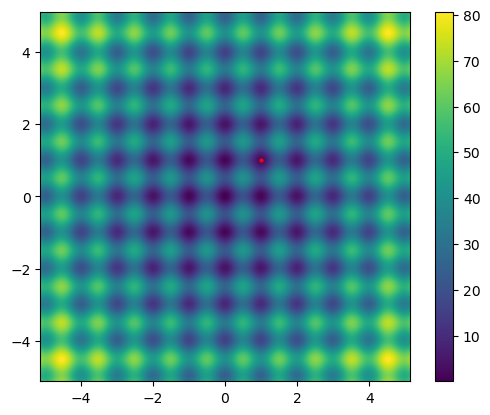

In [124]:
im = plt.imshow(fun_map,
           extent=(xs[0], xs[-1], ys[0], ys[-1]),)
plt.plot(1, 1, 'ro', markersize=2)
plt.colorbar(im)

In [125]:
def visualize_solutions(solutions):
    x, y = solutions.T 
    im = plt.imshow(fun_map,
           extent=(xs[0], xs[-1], ys[0], ys[-1]),)
    plt.plot(x, y, 'ro', markersize=2, alpha=0.2)
    plt.colorbar(im)

In [23]:
class ES():
    def __init__(self):
        self.pop_size = 0

    def ask():
        return []

In [82]:
class NaiveES(ES):
    """Each generation just keep top solution mu, and initialize
       every dimension with the same starting mu and std."""
    def __init__(self, pop_size, dim, mu=0.0, std=1.0):
        self.pop_size = pop_size
        self._dim = dim
        self._mu = np.ones(dim) * mu
        self._std = np.ones(dim) * std
        self._sols = None
    
    def ask(self):
        pop = np.random.normal(self._mu, self._std, (self.pop_size, self._dim))
        self._sols = pop
        return pop
    
    # Using argmin to minimize the function
    def tell(self, fitness):
        if fitness.size != self.pop_size:
            raise Exception(f"Fitness size ({fitness.size}) doesn't match pop_size ({self.pop_size})")
        maxi = np.argmin(fitness)
        self._mu = self._sols[maxi]

    # def result(self):

In [ ]:
class GAES(ES):
    """Each generation, keep the top 10% and let the rest die. To sample, select two parents
       from last generation and child inherits probabilistically from either parent. Inject noise as well"""
    def __init__(self, pop_size, dim, mu=0.0, std=1.0):
        self.pop_size = pop_size
        self._dim = dim
        self._mu = np.ones(dim) * mu
        self._std = np.ones(dim) * std
        self._sols = None
    
    def ask(self):
        pop = np.random.normal(self._mu, self._std, (self.pop_size, self._dim))
        self._sols = pop
        return pop
    
    # Using argmin to minimize the function
    def tell(self, fitness):
        if fitness.size != self.pop_size:
            raise Exception(f"Fitness size ({fitness.size}) doesn't match pop_size ({self.pop_size})")
        maxi = np.argmin(fitness)
        self._mu = self._sols[maxi]

In [59]:
fun = lambda: None
fun = rastrigin

In [134]:
es = NaiveES(100, 2, mu=4.0, std=0.2)


0 5.187443130256158
1 5.022537687909118
2 5.456555951150598
3 5.074145672579954
4 5.072354278211696
5 5.119186531078716
6 5.138504282559676
7 5.200461880987909
8 5.039039963807738
9 5.043302578817244
10 5.168358738519249
11 5.214921668878532
12 5.391999222357192
13 5.041434002314993
14 5.1236247295660835
15 5.135482252923749
16 5.12598607346499
17 5.152630000326026
18 5.162940734441175
19 5.121308517838841
20 5.04916992034147
21 5.069260651273314
22 5.055522326850234
23 5.137492838282892
24 5.021705365466159
25 5.010623431428517
26 5.058494817656614
27 5.297154533626312
28 5.621643101532474
29 5.567959079848102
30 4.976080484914597
31 5.266617546586632
32 5.029542183255362
33 5.6183894036382025
34 5.162816658878679
35 4.993644914578674
36 5.120369952860123
37 5.021242008506116
38 5.146453015108271
39 5.113732196637127
40 5.075635604983081
41 5.034824817004003
42 5.018697091621021
43 5.433599312030445
44 5.035258866174338
45 5.037592359080673
46 5.138235405246366
47 5.050774449165807
48

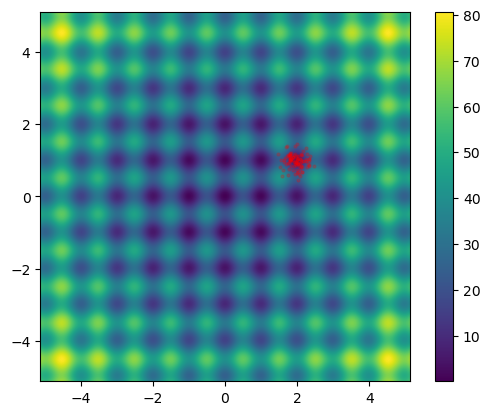

In [192]:
REQUIRED_FITNESS = 0.0

for k in range(100):

  # ask the ES to give us a set of candidate solutions
  solutions = es.ask()

  # create an array to hold the fitness results.
  fitness_list = np.zeros(es.pop_size)

  # evaluate the fitness for each given solution.
  for i in range(es.pop_size):
    fitness_list[i] = fun(solutions[i])

  # give list of fitness results back to ES
  es.tell(fitness_list)

  print(k, np.min(fitness_list))
  # get best parameter, fitness from ES
  # best_solution, best_fitness = es.result()

visualize_solutions(solutions)
  # if best_fitness <= REQUIRED_FITNESS:
  #   break
